In [18]:
import mondrianforest as mf
import numpy as np
import time
import sys
import tracemalloc
import matplotlib.pyplot as plt

In [3]:
def fake_data(n,dim):
    x = np.random.randn(n,dim)
    y = (np.sum(x/(1+np.exp(x)),axis=1))>0
    return x,y

In [9]:
x,y = fake_data(1000,5)
X,Y = fake_data(100,5)

In [10]:
a = time.time()
f = mf.MondrianForestClassifier(n_tree=100)
f.fit(x,y)
f.predict_proba(X)
print(time.time()-a)

/home/harvey/.local/lib/python3.5/site-packages/mondrianforest/classifier.py:76: RuntimeWarning: invalid value encountered in double_scalars
  res[label] /= sum_prob


33.0766761302948


In [11]:
f.score(X,Y)

/home/harvey/.local/lib/python3.5/site-packages/mondrianforest/classifier.py:76: RuntimeWarning: invalid value encountered in double_scalars
  res[label] /= sum_prob


0.91

In [141]:
tracemalloc.start()
f = mf.MondrianForestClassifier(n_tree=100)
f.fit(x,y)
f.predict_proba(X)
snap = tracemalloc.take_snapshot()

/home/harvey/.local/lib/python3.5/site-packages/mondrianforest/classifier.py:76: RuntimeWarning: invalid value encountered in double_scalars
  res[label] /= sum_prob


In [142]:
s=0
for stat in snap.statistics('lineno'):
    s = s + stat.size/1024**2
    print("%s memory blocks: %.1f KiB" % (stat.count, stat.size / 1024))
print("Total {} MiB".format(s))

1584744 memory blocks: 155658.6 KiB
1019383 memory blocks: 108110.0 KiB
680477 memory blocks: 70835.9 KiB
226562 memory blocks: 49560.4 KiB
452876 memory blocks: 26534.8 KiB
545718 memory blocks: 22687.0 KiB
452896 memory blocks: 21236.6 KiB
452731 memory blocks: 21234.0 KiB
452690 memory blocks: 21233.4 KiB
315598 memory blocks: 19063.0 KiB
226111 memory blocks: 17664.9 KiB
227052 memory blocks: 12422.6 KiB
226562 memory blocks: 12390.1 KiB
226335 memory blocks: 12377.7 KiB
130541 memory blocks: 10198.5 KiB
130541 memory blocks: 10198.5 KiB
383850 memory blocks: 7765.9 KiB
322004 memory blocks: 7547.0 KiB
95794 memory blocks: 7483.9 KiB
95794 memory blocks: 7483.9 KiB
409920 memory blocks: 6405.3 KiB
130688 memory blocks: 3063.0 KiB
107650 memory blocks: 1683.1 KiB
48858 memory blocks: 764.5 KiB
301 memory blocks: 65.8 KiB
1493 memory blocks: 40.8 KiB
604 memory blocks: 28.3 KiB
6 memory blocks: 25.9 KiB
47 memory blocks: 24.3 KiB
21 memory blocks: 20.7 KiB
36 memory blocks: 19.6 KiB


In [143]:
f.score(X,Y)

/home/harvey/.local/lib/python3.5/site-packages/mondrianforest/classifier.py:76: RuntimeWarning: invalid value encountered in double_scalars
  res[label] /= sum_prob


0.9

In [144]:
sys.getsizeof(f)

56

In [9]:
f.trees[1]

In [16]:
x,y = fake_data(1000,5)
X,Y = fake_data(100,5)

times = []
acc = []
n = []
for i in range(1,10):
    print(2**i)
    f = mf.MondrianForestClassifier(n_tree=2**i)
    a = time.time()
    f.fit(x,y)
    times.append(time.time()-a)
    #acc.append(f.score(X,Y))
    n.append(2**i)

2
4


/home/harvey/.local/lib/python3.5/site-packages/mondrianforest/classifier.py:76: RuntimeWarning: invalid value encountered in double_scalars
  res[label] /= sum_prob


8
16
32
64
128
256


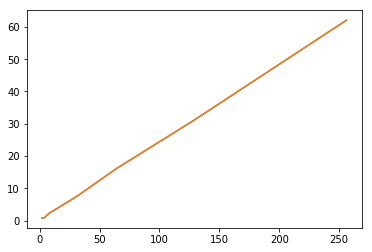

In [20]:
plt.plot(n, times)
plt.show()

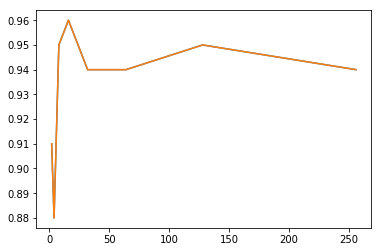

In [22]:
plt.plot(n, acc)
plt.show()

In [23]:
f = mf.MondrianForestClassifier(n_tree=512)
a = time.time()
f.fit(x,y)
time.time()-a

134.36536192893982

In [26]:
times.append(134.36536192893982)

In [25]:
import pandas as pd

In [31]:
d = pd.DataFrame(times)

d.to_csv("times_py")

In [47]:
x,y = fake_data(1000,5)
X,Y = fake_data(100,5)

times = []
acc = []
n = []
for i in range(1,15):
    print(2**i)
    x,y = fake_data(2**i,5)
    f = mf.MondrianForestClassifier(n_tree=50)
    a = time.time()
    f.fit(x,y)
    times.append(time.time()-a)
    #acc.append(f.score(X,Y))
    n.append(2**i)

2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384


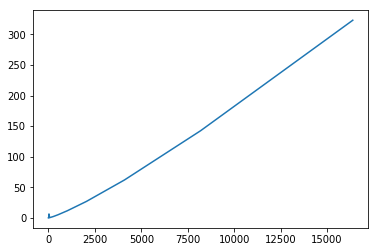

In [48]:
plt.plot(n,times)
plt.show()

In [49]:
d = pd.DataFrame(times)
d.to_csv("times_py_d")

In [50]:
d

,0
0,0.007889
1,0.020139
2,0.039706
3,0.068773
4,6.505405
5,0.405493
6,1.009149
7,2.184178
8,5.095971
9,11.788729
